In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [2]:
# df = pd.read_csv("synthetic_surgical_dataset.csv")
df = pd.read_csv("weight and height.csv")
df.head(20)

,Gender,Height,Weight
0,Male,178,85
1,Female,162,60
2,Male,185,92
3,Female,158,55
4,Male,172,78
5,Female,168,65
6,Male,180,88
7,Female,155,50
8,Male,175,80
9,Female,170,70


In [3]:
df = df.replace({'Male': 0, 'Female': 1})

C:\Users\AsiaLapTop.com\AppData\Local\Temp\ipykernel_16816\1520506033.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({'Male': 0, 'Female': 1})


In [4]:
df.head()

,Gender,Height,Weight
0,0,178,85
1,1,162,60
2,0,185,92
3,1,158,55
4,0,172,78


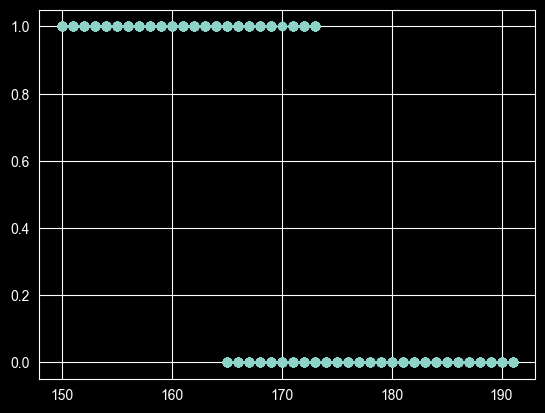

In [5]:
plt.scatter(df['Height'], df['Gender'])
plt.show()

In [6]:
df.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [14]:
# df.drop('Race', axis=1, inplace=True)
# x = df.drop('Complication', axis = 1).copy().values
# y = df['Complication'].copy().values
x = df[['Height', 'Weight']].values
y = df[['Gender']].values

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((1076, 2), (270, 2), (1076, 1), (270, 1))

In [15]:
class Perceptron:
    def __init__(self, learning_rate, input_length):
        self.learning_rate = learning_rate
        self.weights = np.random.rand(input_length)
        self.bias = np.random.rand(1)

    @staticmethod
    def activation_function(z, function):
        if "sigmoid" == function:
            return 1 / (1 + np.exp(-z))
        elif "relu" == function:
            return np.maximum(0, z)
        elif "tanh" == function:
            return np.tanh(z)
        elif "linear" == function:
            return z
        else:
            raise ValueError("Unknown activation function")

    def fit(self, X_train, Y_train, epochs):
        for epoch in tqdm(range(epochs)):
            for x, y in zip(X_train, Y_train):
                # Forwarding
                y_pred = self.forward(X_train)
                dw, db = self.backpropagation(x, y, y_pred)
                self.update(dw, db)

    def forward(self, x):
        return self.activation_function(x @ self.weights + self.bias, 'sigmoid')

    def update(self, dw, db):
        self.weights = self.weights - self.learning_rate * dw
        self.bias = self.bias - self.learning_rate * db

    def backpropagation(self, X_train, Y_train, y_pred):
        error = y_pred - Y_train
        dw = error * X_train
        db = error
        return dw, db

    def predict(self, X_test):
        Y_pred = []
        for x_test in X_test:
            y_pred = x_test @ self.weights + self.bias
            Y_pred.append(self.activation_function(y_pred, 'sigmoid'))
        return np.array(Y_pred)

    def calculate_loss(self, X_test, Y_test, metric):
        Y_pred = self.predict(X_test)
        if metric == "mse":
            return np.mean(np.square(Y_test - Y_pred))
        elif metric == "mae":
            return np.mean(np.abs(Y_test - Y_pred))
        else:
            raise ValueError("Unknown metric")

    def calculate_accuracy(self, X_test, Y_test):
        Y_pred = self.predict(X_test)
        Y_pred = Y_pred.reshape(-1)
        Y_pred = np.where(Y_pred > 0.5, 1, 0)
        acc = np.sum(Y_pred == Y_test) / len(Y_test)
        return acc

    def evaluate(self, X_test, Y_test):
        loss = self.calculate_loss(X_test, Y_test, 'mse')
        acc = self.calculate_accuracy(X_test, Y_test)
        return loss, acc

In [16]:
model = Perceptron(learning_rate=0.001, input_length=X_train.shape[1])
model.fit(X_train, Y_train, epochs=100)

  0%|          | 0/100 [00:00<?, ?it/s]


ValueError: operands could not be broadcast together with shapes (1076,) (2,) 

In [13]:
model.evaluate(X_test, Y_test)

(np.float64(0.5026586186887437), np.float64(0.8925925925925926))

In [17]:
Y_train

array([1, 0, 1, ..., 3, 1, 0], shape=(11200,))

In [14]:
Y_pred = model.predict(X_test)
Y_pred = Y_pred.reshape(-1)
Y_pred = np.where(Y_pred > 0.5, 1, 0)

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_mat = confusion_matrix(Y_test, Y_pred)
conf_mat

array([[126,   0],
       [ 29, 115]])

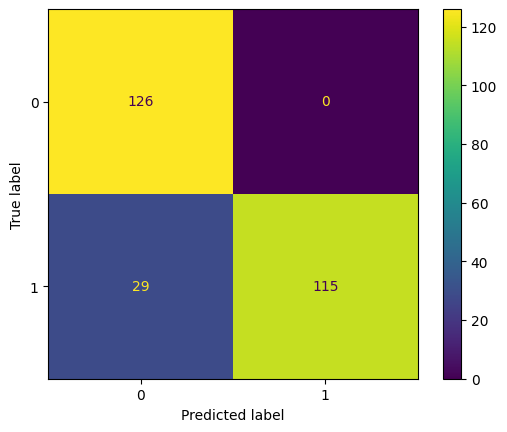

In [24]:
ConfusionMatrixDisplay(conf_mat).plot()
plt.show()